In [1]:
import pandas as pd

terms = {
    'python': 'python',
    'ruby': 'ruby',
    'java': 'java',
    'rust': 'rust',
    'swift': 'swift',
    'haskell': 'Haskell',
    'scala' : 'Scala',
    'elixir': 'elixir',
    'julia': 'julia',
    'perl': 'perl',
    'matlab': 'MATLAB',
    'golang': 'go',
    'typescript': 'typescript',
    'js': 'javascript',
    'javascript': 'javascript',
    'sql': 'SQL',
    'php': 'PHP',
    'html': 'HTML',
    'node.js': 'Node',
    'node': 'Node',
    'c++': 'c++',
    'bash': 'Bash',
    'shell': 'shell',
    'r': 'R',
    'c': 'C',
    'c#': 'C#',
    'graphql': 'GraphQL',
    'angular': 'Angular',
    'react': 'React',
    'reactjs': 'React',
    'clojure': 'Clojure',
    'kotlin': 'Kotlin',
    'powershell': 'PowerShell',
    'css': 'CSS',
    'postgresql': 'PostgreSQL',
    'mysql': 'MySQL',
}
def get_language(arg: str) -> str:
    tokens = arg.replace('.', ' ').replace(',', ' ').lower().split()
    for key, value in terms.items():
        if key in tokens:
            return value
    return 'other'
df = pd.read_csv(filepath_or_buffer='/kaggle/input/alpaca-instructions-word-level-classification/train.csv')
df['instruction length'] = df['instruction'].str.len()
df['text length'] = df['text'].str.len()
df['language'] = df['instruction'].apply(func=get_language)
print(df['language'].value_counts())
df = df[df['language'] == 'other'].sample(frac=1.0, random_state=2023)
# df = df.sample(frac=0.2, random_state=2023) # we need a sample for performance reasons
df.head()

language
other         54035
python        17812
javascript    11768
java           7442
SQL            6908
HTML           4176
c++            3417
React          3210
PHP            1587
C#             1525
C              1474
MySQL          1395
ruby           1022
R               854
CSS             776
swift           757
Bash            741
Angular         531
rust            385
typescript      291
shell           276
PostgreSQL      214
GraphQL         213
Node            194
MATLAB          182
Haskell         165
Scala           140
Kotlin          121
perl             89
go               75
Clojure          70
PowerShell       42
julia            39
elixir           33
Name: count, dtype: int64


input  \
120267  list_items = [1, 2, 3, 4, 5, 6]\n\ndef check_l...   
36482   def insertionSort(array):\n    for i in range(...   
43037                                                 NaN   
38545                                                 NaN   
111905            [(5, 10), (10, 15), (15, 20), (20, 25)]   

                                              instruction  \
120267  Improve the performance of this function by us...   
36482   Analyze the runtime complexity of this inserti...   
43037   Design a function to identify palindromic stri...   
38545   Generate an algorithm using any language of yo...   
111905  Generate a tuple sorting function that takes a...   

                                                     text  \
120267  Below is an instruction that describes a task....   
36482   Below is an instruction that describes a task....   
43037   Below is an instruction that describes a task....   
38545   Below is an instruction that describes a task....   
111905  Below is an instruction that describes a task....   

                                                   output  instruction length  \
120267  list_items = [1, 2, 3, 4, 5, 6]\n\ndef check_l...                  77   
36482   The best case runtime complexity of this inser...                  64   
43037   def is_palindrome(string): \n    left_pos = 0\...                  50   
38545   def fibonacci(n): \n    res = [0] \n    a, b =...                 114   
111905  def sort_tuple(tup): \n    return sorted(tup, ...                 123   

        text length language  
120267          668    other  
36482           842    other  
43037           460    other  
38545           427    other  
111905          452    other

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54035 entries, 120267 to 49735
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   input               36563 non-null  object
 1   instruction         54035 non-null  object
 2   text                54035 non-null  object
 3   output              54023 non-null  object
 4   instruction length  54035 non-null  int64 
 5   text length         54035 non-null  int64 
 6   language            54035 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.3+ MB


In [3]:
df.nunique()

input                 25895
instruction           53859
text                  54033
output                53498
instruction length      645
text length            2813
language                  1
dtype: int64

In [4]:
stop_words_df = pd.read_csv(
    header=None,
    filepath_or_buffer='https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK\'s%2520list%2520of%2520english%2520stopwords')
stopwords = stop_words_df[0].tolist() + ['design', 'generate', 'create', 'develop', 'write']

(-0.5, 1199.5, 1199.5, -0.5)

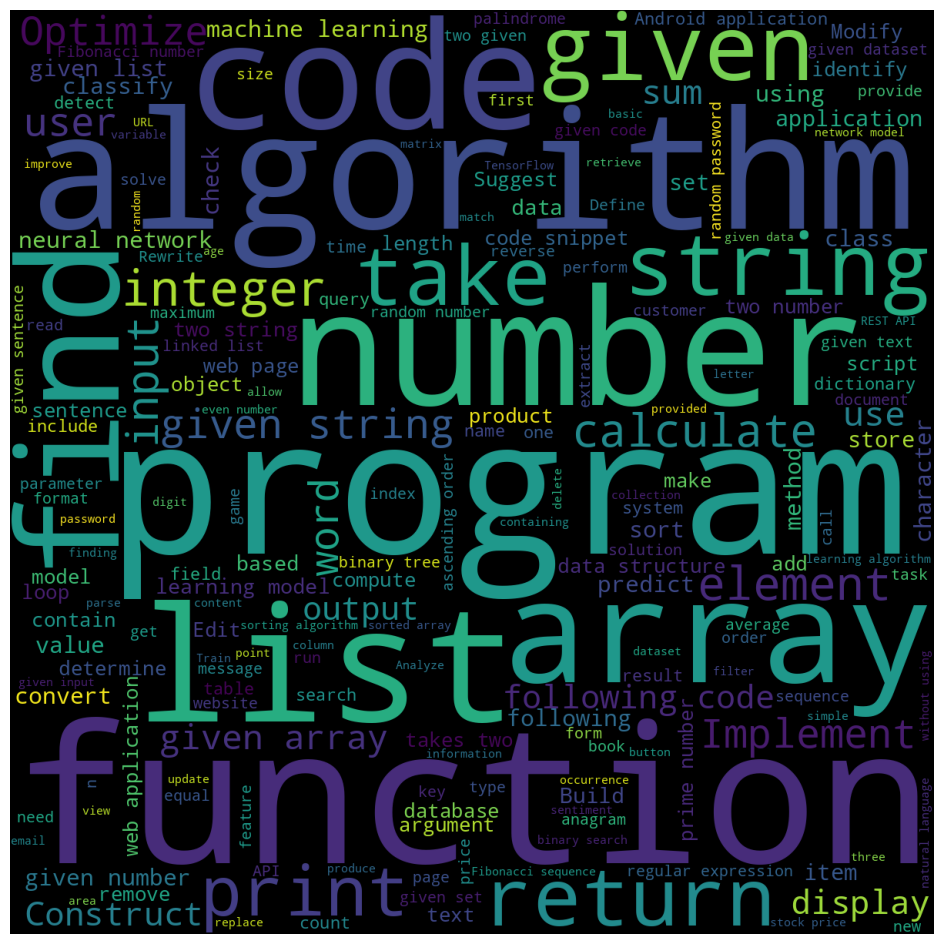

In [5]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

FRACTION = 1.0
subplots(figsize=(12, 12))
text = ' '.join(df.sample(frac=FRACTION, random_state=2023)['instruction'].values.tolist())
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, stopwords=stopwords,).generate(text=text), )
axis('off')

In [6]:
from gensim.corpora import Dictionary
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_multiple_whitespaces
from gensim.parsing.preprocessing import strip_numeric
from gensim.parsing.preprocessing import strip_punctuation
from gensim.parsing.preprocessing import strip_short
from gensim.parsing.preprocessing import strip_tags
CUSTOM_FILTERS = [lambda x: x.lower(), 
                  remove_stopwords, 
                  strip_multiple_whitespaces, 
                  strip_numeric,
                  strip_punctuation,
                  strip_short,
                  strip_tags, 
                 ]
documents = df['instruction'].values.tolist()
texts = [preprocess_string(s=document, filters=CUSTOM_FILTERS) for document in documents]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
print(dictionary)

Dictionary<11128 unique tokens: ['appropriate', 'data', 'function', 'improve', 'performance']...>


In [7]:
from arrow import now
# this determines our runtime and also helps determine how many low-frequency tokens we keep
MAX_VOCAB_SIZE = 5000
from gensim.models import Word2Vec
time_start = now()
word2vec_model = Word2Vec(sentences=texts, vector_size=100, window=5, workers=4, seed=2023, max_vocab_size=MAX_VOCAB_SIZE)
print('vocabulary size: {}'.format(len(word2vec_model.wv)))
print('word2vec time: {}'.format(now() - time_start))

vocabulary size: 2587
word2vec time: 0:00:01.663511


In [8]:
# word2vec_model.wv.most_similar(topn=10, positive=list(terms.keys()))
word2vec_model.wv.most_similar(topn=10, positive=['list'])

[('lists', 0.7249783873558044),
 ('array', 0.7052786350250244),
 ('dictionary', 0.6412167549133301),
 ('arrays', 0.627667248249054),
 ('tuples', 0.6004242300987244),
 ('alphabetically', 0.5998556613922119),
 ('filters', 0.5757830739021301),
 ('tuple', 0.5699800848960876),
 ('together', 0.5522420406341553),
 ('second', 0.5511900782585144)]

In [9]:
from math import log10
from pandas import DataFrame
from sklearn.manifold import TSNE
time_start = now()
init = ['pca', 'random'][0] # choose this to see different shapes
N_COMPONENTS = 3 # we get more diffusion if we get 3 t-sne components
tsne = TSNE(random_state=2023, n_iter=10000, verbose=1, init=init, n_components=N_COMPONENTS,)
tsne_result = tsne.fit_transform(X=word2vec_model.wv.vectors)
tsne_df = DataFrame(data=tsne_result, columns=['x', 'y', 'z'])
tsne_df['word'] = list(word2vec_model.wv.key_to_index.keys())
tsne_df['weight'] = tsne_df['word'].apply(func=lambda x: word2vec_model.wv[x].sum())
tsne_df['count'] = tsne_df['word'].apply(func=lambda x: log10(word2vec_model.wv.get_vecattr(key=x, attr='count')))
print(now() - time_start)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2587 samples in 0.001s...
[t-SNE] Computed neighbors for 2587 samples in 0.229s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2587
[t-SNE] Computed conditional probabilities for sample 2000 / 2587
[t-SNE] Computed conditional probabilities for sample 2587 / 2587
[t-SNE] Mean sigma: 0.254753
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.940010
[t-SNE] KL divergence after 5250 iterations: 1.373415
0:04:21.758748


In [10]:
from plotly.express import scatter
scatter(data_frame=tsne_df, x='x', y='y', hover_name='word', color='weight')

In [11]:
from pandas import DataFrame
from plotly.express import scatter
from umap import UMAP

init = ['pca',  'random', 'spectral', 'tswspectral'][0]
columns = ['u0', 'u1', 'u2']
umap_model = UMAP(n_components=3, random_state=2023, verbose=1, init=init, n_jobs=1)
umap_df = DataFrame(data=umap_model.fit_transform(X=word2vec_model.wv.vectors,), columns=columns)
umap_df['word'] = list(word2vec_model.wv.key_to_index.keys())
umap_df['weight'] = umap_df['word'].apply(func=lambda x: word2vec_model.wv[x].sum())
umap_df['count'] = umap_df['word'].apply(func=lambda x: log10(word2vec_model.wv.get_vecattr(key=x, attr='count')))

scatter(data_frame=umap_df, x='u0', y='u1', hover_name='word', color='weight')

UMAP(init='pca', n_components=3, n_jobs=1, random_state=2023, verbose=1)
Fri Dec  8 15:06:06 2023 Construct fuzzy simplicial set
Fri Dec  8 15:06:10 2023 Finding Nearest Neighbors
Fri Dec  8 15:06:14 2023 Finished Nearest Neighbor Search
Fri Dec  8 15:06:18 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Dec  8 15:06:24 2023 Finished embedding


In [12]:
from arrow import now
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
doc2vec_start = now()
doc2vec_model = Doc2Vec(vector_size=100, min_count=20, epochs=40)
corpus_iterable = [TaggedDocument(item, [index]) for index, item in enumerate(corpus) ]
doc2vec_model.build_vocab(corpus_iterable=corpus_iterable)
doc2vec_model.train(corpus_iterable=corpus_iterable, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs,)
print('doc2vec training time: {}'.format(now() - doc2vec_start))

doc2vec training time: 0:03:25.163487


In [13]:
from pandas import DataFrame
from umap import UMAP

doc2vec_umap_start = now()
init = ['pca',  'random', 'spectral', 'tswspectral'][0]
columns = ['u0', 'u1', 'u2']
doc2vec_umap_model = UMAP(n_components=3, random_state=2023, verbose=1, init=init, n_jobs=1)
doc2vec_umap_df = DataFrame(data=umap_model.fit_transform(X=doc2vec_model.dv.vectors,), columns=columns)
doc2vec_umap_df['document'] = documents
doc2vec_umap_df['short document'] = doc2vec_umap_df['document'].str[:80]
doc2vec_umap_df['language'] = df['language'].values.tolist()
print('doc2vec umap time: {}'.format(now() - doc2vec_umap_start))

UMAP(init='pca', n_components=3, n_jobs=1, random_state=2023, verbose=1)
Fri Dec  8 15:09:49 2023 Construct fuzzy simplicial set
Fri Dec  8 15:09:49 2023 Finding Nearest Neighbors
Fri Dec  8 15:09:49 2023 Building RP forest with 17 trees
Fri Dec  8 15:09:57 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	 6  /  16
	Stopping threshold met -- exiting after 6 iterations
Fri Dec  8 15:10:23 2023 Finished Nearest Neighbor Search
Fri Dec  8 15:10:23 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Dec  8 15:11:11 2023 Finished embedding
doc2vec umap time: 0:01:21.341909


In [14]:
color=['u2', 'language'][0]
scatter(data_frame=doc2vec_umap_df[doc2vec_umap_df['language'] == 'other'], x='u0', y='u1', color=color, height=800, hover_name='short document')